# ERCEMAPI 2022

## Minicurso **Introdução às Redes Neurais Profundas**

## Parte III - Redes Neurais Profundas (em Keras) 

Prof. Josenildo C. da Silva (IFMA)

Prof. Raimundo Osvaldo Vieira (IFMA)


# Setup

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# Redes Neurais Profundas

### Convolução 

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)) #
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
filters = np.zeros(shape=(7, 7, 1,2), dtype=np.float32)
filters[:, 3, :,0] = 1 # vertical line
filters[3, :, :,1] = 1 # horizontal line

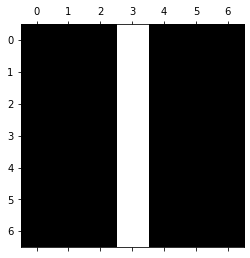

In [ ]:
plt.matshow(filters[:,:,0,0],cmap='gray') # filtro vertical

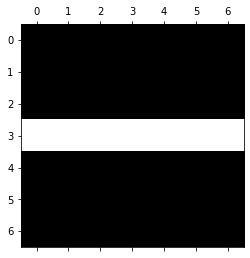

In [ ]:
plt.matshow(filters[:,:,0,1],cmap='gray') # filtro vertical

In [ ]:
outputs = tf.nn.conv2d(train_images[:10], filters, strides=(1,1,1,1), padding="SAME")
outputs.shape

TensorShape([10, 28, 28, 2])

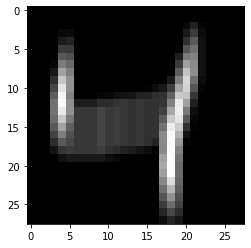

In [ ]:
plt.imshow(outputs[2, :, :,0], cmap="gray") # plot 1st image's 1stfeature map
plt.show()

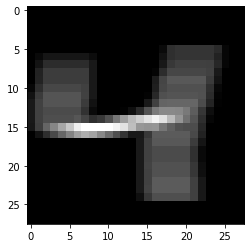

In [ ]:
plt.imshow(outputs[2, :, :,1], cmap="gray") # plot 1st image's 1stfeature map
plt.show()

## ReLU

In [ ]:
output_relu = tf.nn.relu(output)

In [ ]:
output_relu.shape

TensorShape([10, 14, 14, 2])

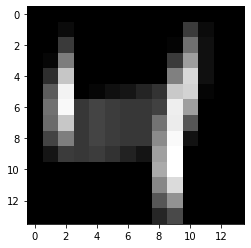

In [ ]:
plt.imshow(output_relu[2, :, :,0], cmap="gray") # plot 1st image's 1stfeature map
plt.show()

## MaxPooling

In [ ]:
output = tf.nn.max_pool(outputs,ksize=2,strides=(1,2,2,1),padding="SAME")

In [ ]:
output.shape

TensorShape([10, 14, 14, 2])

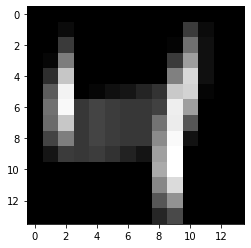

In [ ]:
plt.imshow(output[2, :, :,0], cmap="gray") # plot 1st image's 1stfeature map
plt.show()

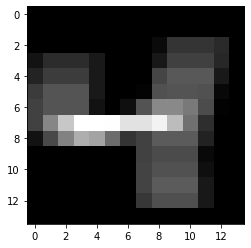

In [ ]:
plt.imshow(output[2, :, :,1], cmap="gray") # plot 1st image's 1stfeature map
plt.show()

# Exemplo (Chollet, 2021. Cap. 8)

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1)) #
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

In [ ]:
partial_train_images = train_images[:50000]
partial_train_labels = train_labels[:50000]
valid_images = train_images[50000:]
valid_labels = train_labels[50000:]

In [ ]:
print(partial_train_images.shape)
print(valid_images.shape)
print(partial_train_labels.shape)
print(valid_labels.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(50000,)
(10000,)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 128)         7385

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(partial_train_images, partial_train_labels, epochs=5, batch_size=64,validation_data=(valid_images,valid_labels))

Epoch 1/5
782/782 [==============================] - 4s 5ms/step - loss: 0.1760 - accuracy: 0.9455 - val_loss: 0.1701 - val_accuracy: 0.9451
Epoch 2/5
782/782 [==============================] - 4s 5ms/step - loss: 0.0479 - accuracy: 0.9856 - val_loss: 0.0457 - val_accuracy: 0.9869
Epoch 3/5
782/782 [==============================] - 4s 5ms/step - loss: 0.0325 - accuracy: 0.9895 - val_loss: 0.0385 - val_accuracy: 0.9901
Epoch 4/5
782/782 [==============================] - 3s 4ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0441 - val_accuracy: 0.9885
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0361 - val_accuracy: 0.9914


In [ ]:
import pandas as pd

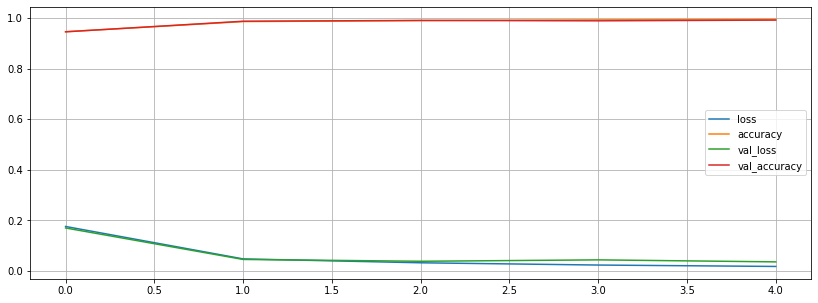

In [ ]:
pd.DataFrame(history.history).plot(figsize=(14, 5)).plot()
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
eval_results = model.evaluate(test_images, test_labels,batch_size=64)

157/157 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9917


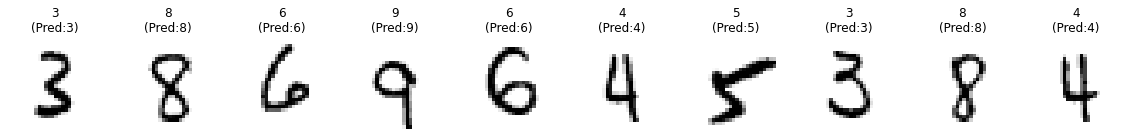

In [ ]:
X_new = valid_images[:10]
Y_new = valid_labels[:10]
y_pred = model.predict(X_new)
classes_pred = np.argmax(y_pred, axis=1)
r=0
fig,axes = plt.subplots(nrows=1,ncols=10,figsize=(20,12))
for ax in axes:
    some_image =X_new[r].reshape(28,28)
    ax.imshow(X=some_image, cmap = "binary", interpolation="nearest")
    ax.set_title(str(Y_new[r])+ "\n(Pred:" +str(classes_pred[r])+")")
    ax.axis("off")
    r+=1
#plt.axis("off")
plt.show()

# Exemplo Cats vs Dogs

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
classNames = ['cat', 'dog']


In [ ]:
split=['train[:70%]', 'train[70%:85%]', 'train[85%:]']

In [ ]:
trainDataset, validDataset,testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

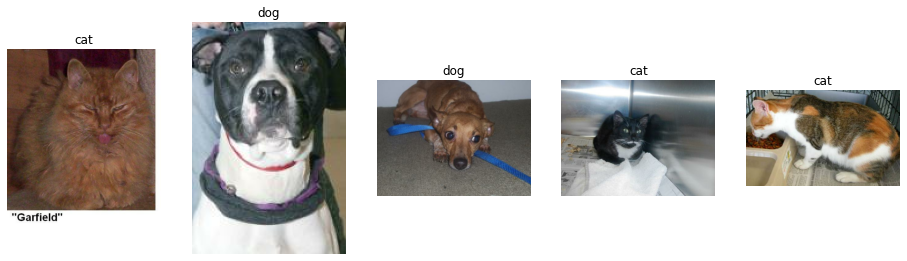

In [ ]:
i = 0
fig, ax = plt.subplots(1, 5,figsize=(16,5))
for image, label in testDataset.take(5):
    ax[i].axis('off')
    ax[i].set_title(classNames[int(label)])
    ax[i].imshow(image)
    i += 1
plt.show()

In [ ]:
HEIGHT, WIDTH = 200,200

In [ ]:
def preprocess(img, label):
    return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, label

In [ ]:
trainDataset = trainDataset.map(preprocess).batch(32)
validDataset = validDataset.map(preprocess).batch(32)
testDataset = testDataset.map(preprocess).batch(32)

In [ ]:
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"),
                                      layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.2),])

In [ ]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16, (5, 5), activation='relu', input_shape=(HEIGHT, WIDTH, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
trainHistory = model.fit(trainDataset, epochs=15,validation_data=validDataset)

Epoch 1/15
509/509 [==============================] - 29s 54ms/step - loss: 0.6881 - accuracy: 0.5696 - val_loss: 0.6429 - val_accuracy: 0.6493
Epoch 2/15
509/509 [==============================] - 28s 54ms/step - loss: 0.6127 - accuracy: 0.6690 - val_loss: 0.6869 - val_accuracy: 0.5811
Epoch 3/15
509/509 [==============================] - 28s 55ms/step - loss: 0.5448 - accuracy: 0.7278 - val_loss: 0.4905 - val_accuracy: 0.7610
Epoch 4/15
509/509 [==============================] - 27s 54ms/step - loss: 0.5008 - accuracy: 0.7640 - val_loss: 0.5377 - val_accuracy: 0.7564
Epoch 5/15
509/509 [==============================] - 29s 56ms/step - loss: 0.4666 - accuracy: 0.7825 - val_loss: 0.4293 - val_accuracy: 0.8135
Epoch 6/15
509/509 [==============================] - 27s 54ms/step - loss: 0.4375 - accuracy: 0.8030 - val_loss: 0.4302 - val_accuracy: 0.8146
Epoch 7/15
509/509 [==============================] - 27s 54ms/step - loss: 0.4118 - accuracy: 0.8183 - val_loss: 0.3425 - val_accuracy:

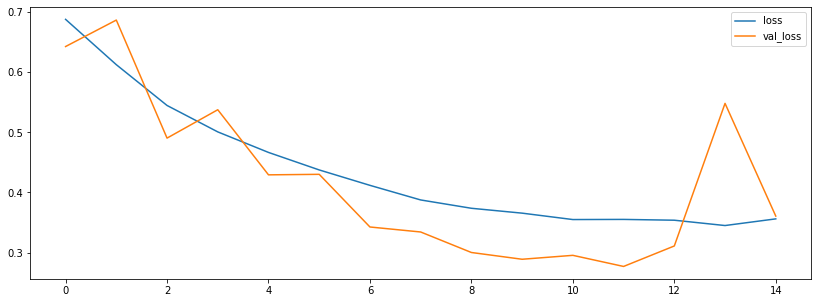

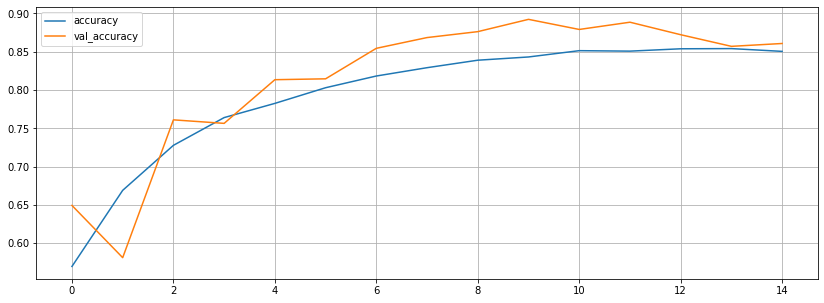

In [ ]:
h = pd.DataFrame(trainHistory.history)
h[['loss','val_loss']].plot(figsize=(14, 5)).plot()
h[['accuracy','val_accuracy']].plot(figsize=(14, 5)).plot()
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(testDataset)

110/110 [==============================] - 4s 37ms/step - loss: 0.3463 - accuracy: 0.8656


[0.3463069796562195, 0.8655775189399719]

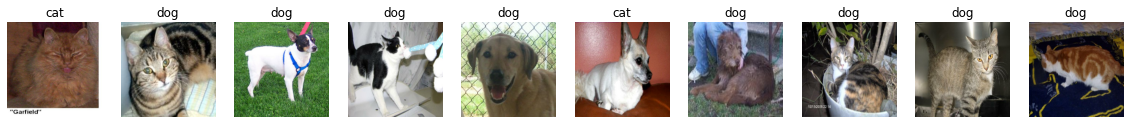

In [ ]:
predictions = model.predict(testDataset.take(8))

i = 0
fig, ax = plt.subplots(1, 10,figsize=(20,8))
for image, _ in testDataset.take(10):
    predictedLabel = int(predictions[i] >= 0.5)

    ax[i].axis('off')
    ax[i].set_title(classNames[predictedLabel])
    ax[i].imshow(image[0])
    i += 1

plt.show()

# Referências
- Chollet (2021) Cap. 8
- https://poloclub.github.io/cnn-explainer/
- https://lindevs.com/classify-images-of-dogs-and-cats-using-cnn-and-tensorflow-2